## Run m_skill times with m_skill += 1 each times

With 1 constraint : 
Generation: 1	Fitness: 1678006.4076559127	Population: 1521
Generation: 2	Fitness: 1675107.1690068652	Population: 1543
Generation: 3	Fitness: 1674984.4422313569	Population: 1626
Generation: 4	Fitness: 1674984.4422313569	Population: 1851
Generation: 5	Fitness: 1440746.2895897029	Population: 2256
Generation: 6	Fitness: 1247453.5555966669	Population: 2701
Generation: 7	Fitness: 882593.0842971411	Population: 2800
Generation: 8	Fitness: 882593.0842971411	Population: 2901
Generation: 9	Fitness: 686436.0168303491	Population: 2912
Generation: 10	Fitness: 686436.0168303491	Population: 2878
Generation: 11	Fitness: 686436.0168303491	Population: 2856
Generation: 12	Fitness: 686436.0168303491	Population: 2809
Generation: 13	Fitness: 686436.0168303491	Population: 2770
['I_love_tigersugar', 'NGUYEN_THANH_LOI', 'PalmPTSJ']


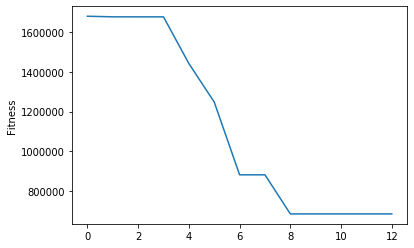

Excution time: 0:00:03.191439s


With 2 constraint : 
Generation: 1	Fitness: 1674458.2861594462	Population: 1513
Generation: 2	Fitness: 1674458.2861594462	Population: 1534
Generation: 3	Fitness: 1669679.21565479	Population: 1595
Generation: 4	Fitness: 1669679.21565479	Population: 1768
Generation: 5	Fitness: 1294337.6027517081	Population: 2103
Generation: 6	Fitness: 1093079.3133807199	Population: 2658
Generation: 7	Fitness: 1093079.3133807199	Population: 2841
Generation: 8	Fitness: 859020.3945352574	Population: 2921
Generation: 9	Fitness: 859020.3945352574	Population: 2900
Generation: 10	Fitness: 845268.4861132916	Population: 2856
Generation: 11	Fitness: 686436.0168303491	Population: 2869
Generation: 12	Fitness: 686436.0168303491	Population: 2845
Generation: 13	Fitness: 686436.0168303491	Population: 2794
Generation: 14	Fitness: 686436.0168303491	Population: 2757
Generation: 15	Fitness: 686436.0168303491	Population: 2766
['NGUYEN_THANH_LOI', 'I_love_tigersugar', 'PalmPTSJ']


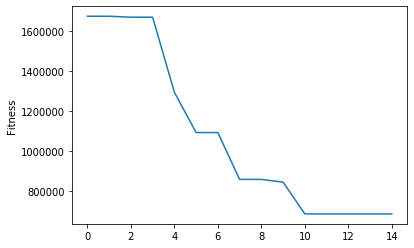

Excution time: 0:00:03.473570s


With 3 constraint : 
Generation: 1	Fitness: 1675769.8957257518	Population: 1514
Generation: 2	Fitness: 1658689.280681275	Population: 1537
Generation: 3	Fitness: 1658689.280681275	Population: 1598
Generation: 4	Fitness: 1364421.5753084398	Population: 1798
Generation: 5	Fitness: 1359176.5557835368	Population: 2208
Generation: 6	Fitness: 1001349.6339380465	Population: 2681
Generation: 7	Fitness: 1001349.6339380465	Population: 2795
Generation: 8	Fitness: 882593.0842971411	Population: 2888
Generation: 9	Fitness: 882593.0842971411	Population: 2852
Generation: 10	Fitness: 818144.5506752727	Population: 2863
Generation: 11	Fitness: 818144.5506752727	Population: 2858
Generation: 12	Fitness: 686436.0168303491	Population: 2854
Generation: 13	Fitness: 686436.0168303491	Population: 2847


KeyboardInterrupt: 

In [2]:
## import numpy as np
import csv
import heapq
import random
import math
import matplotlib.pyplot as plt
import atexit
from time import time, strftime, localtime
from datetime import timedelta

def secondsToStr(elapsed=None):
    if elapsed is None:
        return strftime("%S", localtime())
    else:
        return str(timedelta(seconds=elapsed))

def log(s, elapsed=None):
    line = "="*40
    if elapsed:
        print(elapsed)

def endlog(start):
    end = time()
    elapsed = end-start
    return secondsToStr(elapsed)


h_member = 3
generation_size = 5
list_fitness =[]
population_temp = []
Z = 0.3

## so skill chuyen vao
m_skill = 37
list_totalscore = []
with open(r"C:\Users\DUONG\Desktop\data-selection\allfromasia.csv", "rt",encoding = 'unicode_escape') as f:
    reader = csv.reader((line.replace('\0','') for line in f))
    countt = 0
    for line in enumerate(reader):
        cost = 0
        count=0
        check_mskill = 0
        candi = []
        for row in line[1]:
            if(countt == 0):
                candi.append(row)
                count = count + 1
            else:
                if(count < 3):
                    candi.append(row)
                else:
                    candi.append(float(row))
                    cost += float(row)
                count = count + 1
            check_mskill += 1
        countt += 1
        population_temp.append(candi)
        list_totalscore.append(cost)
    population_size = round((len(population_temp)-1)*0.8)
    m = m_skill
    
start = time()
atexit.register(endlog)
log("")

del population_temp[0]
for i in range(0,len(population_temp)):
    del population_temp[i][0]
    del population_temp[i][1]

totalscore = sum(list_totalscore)
C = (h_member*3)/len(population_temp)    

class Individual(object):
    def __init__(self, candi,list_score): 
        self.candi = candi 
        self.list_score = list_score
        self.fitness = self.cal_fitness()
        self.cost = self.calCost()
        
    def cal_fitness(self):
        fitness = 0
        for j in range(1,m+1):
            team_score = 0
            for k in range(h_member):
                team_score = team_score + self.candi[k][j]
            fitness = fitness + (self.list_score[j-1]-team_score)**2
        fitness = math.sqrt(fitness)
        return fitness
    
    def calCost(self):
        sum_gp1 = 0
        for gp1 in self.candi:
            sum_gp1 += sum(gp1[1:m+1])
        return sum_gp1/totalscore
    
    def mate(self,partner,list_score):
        child = []
        for gp1, gp2 in zip(self.candi,partner.candi):
            sum_gp1 = sum(gp1[1:m+1])
            sum_gp2 = sum(gp2[1:m+1])
            bett = gp1 if sum_gp1 > sum_gp2 else gp2
            wors = gp2 if sum_gp1 > sum_gp2 else gp1
            prob = random.random()
            if prob < 0.60:
                if bett in child:
                    pass
                else:
                    child.append(bett)
            elif prob < 0.90:
                if wors in child:
                    pass
                else:
                    child.append(wors)
            else:
                tem = random.choice(population_temp[::])
                if tem in child:
                    pass
                else:
                    child.append(tem)
        while len(child) < 3:
            j = random.choice(population_temp[::])
            if j in child:
                pass
            else:
                child.append(j)
        return Individual(child,list_score)
    
    def check_minimumscore(self,list_score,m_skill):
        for j in range(1,m_skill+1):
            team_score = 0
            for k in range(h_member):
                team_score = team_score + self.candi[k][j]
            if Z*list_score[j-1] > team_score:
                return 0
            else:
                return 1
    def check_cost(self):
        if self.cost < C:
            return 1
        else:
            return 0

def GAs(m_skill):
    start = time()
    global population_size
    global generation_size
    global m
    list_fitness = []
    global h_member
    population = []
    candi = []

    list_score = []
    score = []
    for j in range(1,m+1):
        for i in range(0,len(population_temp)-1):
            score.append(population_temp[i][j])
        top3 = sorted(zip(score), reverse=True)[:h_member]
        summ = 0
        for i in top3:
            summ = summ + i[0]
        list_score.append(summ)
        score = []
    
    for _ in range(0,population_size):
        for _ in range(h_member):
            while len(candi) < 3:
                j = random.choice(population_temp[::])
                if j in candi:
                    pass
                else:
                    candi.append(j)
        copy = candi.copy()
        population.append(Individual(copy,list_score))
        del candi[::]
        
    loop_check = False
    generation = 1

    print("With {0} constraint : ".format(m_skill))
    while True:
        population = sorted(population, key = lambda x:x.fitness,reverse=False)
        
        new_generation = []
        s = int((10*population_size)/100)
        new_generation.extend(population[:s])
        
        s = int((90*population_size)/100)
        for _ in range(s):
            parent1 = random.choice(population[:round(population_size*0.5)])
            parent2 = random.choice(population[:round(population_size*0.5)])
            child = parent1.mate(parent2,list_score)
            new_generation.append(child) 
  
        population = new_generation
        for p in population:
            if (p.check_minimumscore(list_score,m_skill) !=1):
                population.remove(p)
                
        print("Generation: {0}\tFitness: {1}\tPopulation: {2}".
        format(generation,
        population[0].fitness,len(population)))
        list_fitness.append(round(population[0].fitness))
        
        if generation_size - generation < 0:
            fit_check = list_fitness[generation-1]
            j = 1
            for i in range(1,generation_size+1):
                if list_fitness[generation-i-1] == fit_check:
                    j = j + 1
            if j == 5:
                loop_check = True
        if loop_check == True:
            break
        generation += 1
    list_mem_choose = []
    for i in range(h_member):
        list_mem_choose.append(population[0].candi[i][0])
#         print(population[0].candi[i][0:m_skill+1],"\n")
    print(list_mem_choose)
    return list_fitness,endlog(start)

def main():
    for i in range(1,m_skill+1):
        list_fitness,end = GAs(i)
        plt.plot(list_fitness)
        plt.ylabel('Fitness')
        plt.show()
        print("Excution time: {0}s\n\n".format(end))
#     list_fitness,end = GAs(37)
#     plt.plot(list_fitness)
#     plt.ylabel('Fitness')
#     plt.show()
#     print("Excution time: {0}s\n\n".format(end))

if __name__ == '__main__':
    main()


In [48]:
#     population = []
#     candi = []

#     for _ in range(0,population_size):
#         for _ in range(h_member):
#             while len(candi) < 3:
#                 j = random.choice(population_temp[::])
#                 if j in candi:
#                     pass
#                 else:
#                     candi.append(j)
#         copy = candi.copy()
#         population.append(Individual(copy))
#         del candi[::]

In [ ]:
#     for _ in range(0,population_size-1):
#         if(limit <= len(population_temp)-3):
#             candi.append(population_temp[limit])
#             candi.append(population_temp[limit+1])
#             candi.append(population_temp[limit+2])
#             limit += 3
#         else:
#             while len(candi) < 3:
#                 j = random.choice(population_temp[::])
#                 if j in candi:
#                     pass
#                 else:
#                     candi.append(j)
#         copy = candi.copy()
#         population.append(Individual(copy))
#         del candi[::]

## Run 1 time

0.002389169100079639
Population in the beginning: 3014
Generation: 1	Fitness: 1661919.291591133	Population: 1522
Generation: 2	Fitness: 1649809.541300409	Population: 1571
Generation: 3	Fitness: 1090536.1168916046	Population: 1710
Generation: 4	Fitness: 1090536.1168916046	Population: 2000
Generation: 5	Fitness: 922204.8158260289	Population: 2408
Generation: 6	Fitness: 922204.8158260289	Population: 2635
Generation: 7	Fitness: 818144.5506752727	Population: 2718
Generation: 8	Fitness: 686436.0168303491	Population: 2724
Generation: 9	Fitness: 686436.0168303491	Population: 2720
Generation: 10	Fitness: 686436.0168303491	Population: 2666
Generation: 11	Fitness: 686436.0168303491	Population: 2584
Generation: 12	Fitness: 686436.0168303491	Population: 2545


['I_love_tigersugar', 89816.10909, 104953.6857, 12950.16667, 19596.60909, 40048.05433, 38079.10433, 102108.8758, 77778.36147, 858.6666667, 835.0, 33023.34286, 24913.18766, 44249.58571, 28433.15671, 2376.5, 6900.333333, 9413.683333, 35737.2023

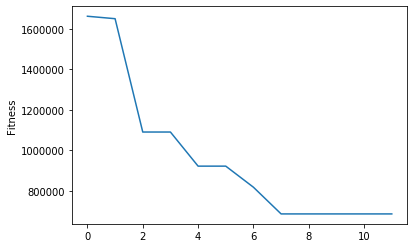

In [21]:
import numpy as np
import csv
import heapq
import random
import math
import matplotlib.pyplot as plt
import atexit
from time import time, strftime, localtime
from datetime import timedelta

def secondsToStr(elapsed=None):
    if elapsed is None:
        return strftime("%S", localtime())
    else:
        return str(timedelta(seconds=elapsed))

def log(s, elapsed=None):
    line = "="*40
    if elapsed:
        print(elapsed)

def endlog():
    end = time()
    elapsed = end-start
    return secondsToStr(elapsed)


h_member = 3
generation_size = 5
list_fitness =[]
population_temp = []
D = 0.8
W = []
## so skill chuyen vao
m_skill = 37
list_totalscore = []
with open(r"C:\Users\DUONG\Desktop\data-selection\allfromasia.csv", "rt",encoding = 'unicode_escape') as f:
    reader = csv.reader((line.replace('\0','') for line in f))
    countt = 0
    for line in enumerate(reader):
        count=0
        cost = 0
        check_mskill = 0
        candi = []
        for row in line[1]:
            if check_mskill - 3 == m_skill:
                break
            if(countt == 0):
                candi.append(row)
                count = count + 1
            else:
                if(count < 3):
                    candi.append(row)
                else:
                    candi.append(float(row))
                    cost += float(row)
                count = count + 1
            check_mskill += 1
        countt += 1
        population_temp.append(candi)
        list_totalscore.append(cost)
    population_size = round((len(population_temp)-1)*D)
    m = m_skill
    
start = time()
atexit.register(endlog)
log("")

del population_temp[0]
for i in range(0,len(population_temp)):
    del population_temp[i][0]
    del population_temp[i][1]
    
totalscore = sum(list_totalscore)
C = (h_member*3)/len(population_temp)
print(C)
list_score = []
score = []
for j in range(1,m+1):
    for i in range(0,len(population_temp)-1):
        score.append(population_temp[i][j])
    top3 = sorted(zip(score), reverse=True)[:h_member]
    summ = 0
    for i in top3:
        summ = summ + i[0]
    list_score.append(summ)
    score = []

class Individual(object):
    def __init__(self, candi): 
        self.candi = candi  
        self.fitness = self.cal_fitness()
        self.cost = self.calCost()

    def cal_fitness(self):
        fitness = 0
        for j in range(1,m+1):
            team_score = 0
            for k in range(h_member):
                team_score = team_score + self.candi[k][j]
            fitness = fitness + (list_score[j-1]-team_score)**2
        fitness = math.sqrt(fitness)
        return fitness
    
    def calCost(self):
        sum_gp1 = 0
        for gp1 in self.candi:
            sum_gp1 += sum(gp1[1:m+1])
        return sum_gp1/totalscore
        
    def mate(self,partner):
        child = []
        for gp1, gp2 in zip(self.candi,partner.candi):
            sum_gp1 = sum(gp1[1:m+1])
            sum_gp2 = sum(gp2[1:m+1])
            bett = gp1 if sum_gp1 > sum_gp2 else gp2
            wors = gp2 if sum_gp1 > sum_gp2 else gp1
            prob = random.random()
            if prob < 0.60:
                if bett in child:
                    pass
                else:
                    child.append(bett)
            elif prob < 0.30:
                if wors in child:
                    pass
                else:
                    child.append(wors)
            else:
                tem = random.choice(population_temp[::])
                if tem in child:
                    pass
                else:
                    child.append(tem)
        while len(child) < h_member:
            j = random.choice(population_temp[::])
            if j in child:
                pass
            else:
                child.append(j)
        return Individual(child)
    
    def check_minimumscore(self):
        for j in range(1,m+1):
            team_score = 0
            for k in range(h_member):
                team_score = team_score + self.candi[k][j]
            if 0.3*list_score[j-1] > team_score:
                return 0
            else:
                return 1
    def check_cost(self):
        if self.cost < C:
            return 1
        else:
            return 0
    
def main():
    global population_size
    global generation_size
    global list_fitness
    global h_member
    population = []
    candi = []

    for _ in range(0,population_size):
        for _ in range(h_member):
            while len(candi) < h_member:
                j = random.choice(population_temp[::])
                if j in candi:
                    pass
                else:
                    candi.append(j)
        copy = candi.copy()
        population.append(Individual(copy))
        del candi[::]

    loop_check = False
    generation = 1
#     for i in range(0,len(list_score)):
#         print(list_score[i])
    print("Population in the beginning: {0}".format(len(population)))
    while True:
        population = sorted(population, key = lambda x:x.fitness,reverse=False)
        #giuwx 10
        new_generation = []
        s = int((10*population_size)/100)
        new_generation.extend(population[:s])
        
        s = int((90*population_size)/100)
        for _ in range(s):
            parent1 = random.choice(population[:round(population_size*0.5)])
            parent2 = random.choice(population[:round(population_size*0.5)])
            child = parent1.mate(parent2)
            new_generation.append(child) 
  
        population = new_generation
        population = sorted(population, key = lambda x:x.fitness,reverse=False)
        for p in population:
            if (p.check_minimumscore() !=1 or p.check_minimumscore() != 1):
                population.remove(p)
        print("Generation: {0}\tFitness: {1}\tPopulation: {2}".
        format(generation,
        population[0].fitness,len(population)))
        list_fitness.append(round(population[0].fitness))
        
        if generation_size - generation < 0:
            fit_check = list_fitness[generation-1]
            j = 1
            for i in range(1,generation_size+1):
                if list_fitness[generation-i-1] == fit_check:
                    j = j + 1
            if j == 5:
                loop_check = True
        if loop_check == True:
            break
        generation += 1

    print("\n")
    for i in range(h_member):
        print(population[0].candi[i],"\n")
if __name__ == '__main__':
    main()

plt.plot(list_fitness)
plt.ylabel('Fitness')
print("\n\nExcution time: {0}s".format(endlog()))

In [ ]:
import matplotlib.pyplot as plt
plt.
plt.plot(list_fitness)
plt.ylabel('Fitness')

## Customize

Population in the beginning: 1807
Generation: 1	Fitness: 3458.6019227046067	Population: 1800
Generation: 2	Fitness: 3453.338720985678	Population: 1800
Generation: 3	Fitness: 3450.1058536443484	Population: 1804
Generation: 4	Fitness: 3447.106963945563	Population: 1805
Generation: 5	Fitness: 3440.2096826360744	Population: 1806
Generation: 6	Fitness: 3440.2096826360744	Population: 1803
Generation: 7	Fitness: 3439.712531654208	Population: 1806
Generation: 8	Fitness: 3436.7203077730956	Population: 1806
Generation: 9	Fitness: 3434.6725430221145	Population: 1806
Generation: 10	Fitness: 3434.6725430221145	Population: 1806
Generation: 11	Fitness: 3434.6725430221145	Population: 1806
Generation: 12	Fitness: 3430.827557139093	Population: 1806
Generation: 13	Fitness: 3430.827557139093	Population: 1806
Generation: 14	Fitness: 3430.827557139093	Population: 1806
Generation: 15	Fitness: 3430.827557139093	Population: 1806
Generation: 16	Fitness: 3430.827557139093	Population: 1806


['ALT548', 96.0, 96.0

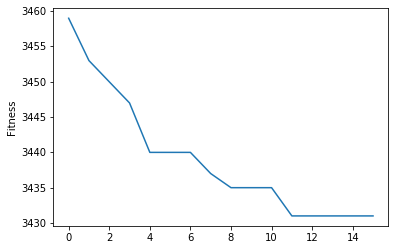

In [88]:
import numpy as np
epsilon= np.finfo(float).eps
import csv
import heapq
import random
import math
import matplotlib.pyplot as plt
import atexit
from time import time, strftime, localtime
from datetime import timedelta

def secondsToStr(elapsed=None):
    if elapsed is None:
        return strftime("%S", localtime())
    else:
        return str(timedelta(seconds=elapsed))

def log(s, elapsed=None):
    line = "="*40
    if elapsed:
        print(elapsed)

def endlog():
    end = time()
    elapsed = end-start
    return secondsToStr(elapsed)


h_member = 10
generation_size = 10
list_fitness =[]
population_temp = []
D = 0.8
W = []

## so skill chuyen vao
m_skill = 14

list_totalscore = []


with open(r"C:\Users\DUONG\Desktop\data2k2.csv", "rt",encoding = 'unicode_escape') as f:
    reader = csv.reader((line.replace('\0','') for line in f))
    countt = 0
    for line in enumerate(reader):
        count=0
        cost = 0
        check_mskill = 0
        candi = []
        for row in line[1]:
            if check_mskill - 1 == m_skill:
                break
            if(countt == 1):
                break
            if(countt == 0):
                if(count > 0):
                    W.append(float(row))
                count = count + 1
            else:
                if(count < 1):
                    candi.append(row)
                else:
                    candi.append(float(row))
                    cost += float(row)
                count = count + 1
            check_mskill += 1
        countt += 1
        population_temp.append(candi)
        list_totalscore.append(cost)
    population_size = round((len(population_temp)-1)*D)
    m = m_skill

start = time()
atexit.register(endlog)
log("")



del population_temp[0]
del population_temp[0]

totalscore = sum(list_totalscore)
C = (h_member*3)/len(population_temp)

list_score = []
score = []

for j in range(1,m+1):
    for i in range(0,len(population_temp)-1):
        score.append(population_temp[i][j])
    top3 = sorted(zip(score), reverse=True)[:h_member]
    summ = 0
    for i in top3:
        summ = summ + i[0]
    list_score.append(summ)
    score = []

class Individual1(object):
    def __init__(self, candi): 
        self.candi = candi
        self.fitness = self.cal_fitness()

    def cal_fitness(self):
        fitness = 0
        for j in range(0,m):
            fitness = fitness + self.candi[j+1] * W[j]
        return fitness

    
class Individual(object):
    def __init__(self, candi): 
        self.candi = candi  
        self.fitness = self.cal_fitness()
        self.cost = self.calCost()

    def cal_fitness(self):
        fitness = 0
        for j in range(1,m):
            team_score = 0
            for k in range(h_member):
                team_score = team_score + self.candi[k][j] * W[j]
            fitness = fitness + (list_score[j-1]-team_score)**2
        fitness = math.sqrt(fitness)
        return fitness
    
    def calCost(self):
        sum_gp1 = 0
        for gp1 in self.candi:
            sum_gp1 += sum(gp1[1:m+1])
        return sum_gp1/totalscore
        
    def mate(self,partner):
        child = []
        for gp1, gp2 in zip(self.candi,partner.candi):
            sum_gp1 = sum(gp1[1:m+1])
            sum_gp2 = sum(gp2[1:m+1])
            bett = gp1 if sum_gp1 > sum_gp2 else gp2
            wors = gp2 if sum_gp1 > sum_gp2 else gp1
            prob = random.random()
            if prob < 0.60:
                if bett in child:
                    pass
                else:
                    child.append(bett)
            elif prob < 0.30:
                if wors in child:
                    pass
                else:
                    child.append(wors)
            else:
                tem = random.choice(population_temp[::])
                if tem in child:
                    pass
                else:
                    child.append(tem)
        while len(child) < h_member:
            j = random.choice(population_temp[::])
            if j in child:
                pass
            else:
                child.append(j)
        return Individual(child)
    
    def check_minimumscore(self):
        for j in range(1,m+1):
            team_score = 0
            for k in range(h_member):
                team_score = team_score + self.candi[k][j]
            if 0.3*list_score[j-1] > team_score:
                return 0
            else:
                return 1
    def check_cost(self):
        if self.cost < C:
            return 1
        else:
            return 0

def f_equal(a, b):
    return abs(a - b) < epsilon
        
def main():
    global population_size
    global generation_size
    global list_fitness
    global h_member
    population = []
    candi = []

    for _ in range(0,population_size):
        for _ in range(h_member):
            while len(candi) < h_member:
                j = random.choice(population_temp[::])
                if j in candi:
                    pass
                else:
                    candi.append(j)
        copy = candi.copy()
        population.append(Individual(copy))
        del candi[::]

    loop_check = False
    generation = 1
    
    print("Population in the beginning: {0}".format(len(population)))
    while True:
        population = sorted(population, key = lambda x:x.fitness,reverse=False)
        
        new_generation = []
        s = int((10*population_size)/100)
        new_generation.extend(population[:s])
        
        s = int((90*population_size)/100)
        for _ in range(s):
            parent1 = random.choice(population[:round(population_size*0.5)])
            parent2 = random.choice(population[:round(population_size*0.5)])
            child = parent1.mate(parent2)
            new_generation.append(child) 
  
        population = new_generation
        population = sorted(population, key = lambda x:x.fitness,reverse=False)
        for p in population:
            if (p.check_minimumscore() !=1 or p.check_minimumscore() != 1):
                population.remove(p)
                
        print("Generation: {0}\tFitness: {1}\tPopulation: {2}".
        format(generation,population[0].fitness,len(population)))
        
        list_fitness.append(round(population[0].fitness))
        
        if generation_size - generation < 0:
            fit_check = round(list_fitness[generation-1])
            j = 1
            for i in range(1,generation_size+1):
                if f_equal(list_fitness[generation-i-1],fit_check):
                    j = j + 1
            if j == 5:
                loop_check = True
        if loop_check == True:
            break
        generation += 1

    print("\n")
    for i in range(h_member):
        print(population[0].candi[i],"\n")
        
    #Ranking
    population1 = []
    candi = []
    for i in range(h_member):
        population1.append(Individual1(population[0].candi[i]))
    population1 = sorted(population1, key = lambda x:x.fitness,reverse=True)
    
    for i in range(0,len(population1)):
        print("Ranking {0}: {1}".
        format(i+1,population1[i].candi[0]))
        
        
if __name__ == '__main__':
    main()

plt.plot(list_fitness)
plt.ylabel('Fitness')
print("\n\nExcution time: {0}s".format(endlog()))

## Ranking

In [15]:
import numpy as np
epsilon= np.finfo(float).eps
import csv
import heapq
import random
import math
import matplotlib.pyplot as plt
import atexit
from time import time, strftime, localtime
from datetime import timedelta

def secondsToStr(elapsed=None):
    if elapsed is None:
        return strftime("%S", localtime())
    else:
        return str(timedelta(seconds=elapsed))

def log(s, elapsed=None):
    line = "="*40
    if elapsed:
        print(elapsed)

def endlog():
    end = time()
    elapsed = end-start
    return secondsToStr(elapsed)


h_member = 5
generation_size = 5
list_fitness =[]
population_temp = []
D = 0.8
W = []
## so skill chuyen vao
m_skill = 15
list_totalscore = []
with open(r"C:\Users\DUONG\Desktop\Book1.csv", "rt",encoding = 'unicode_escape') as f:
    reader = csv.reader((line.replace('\0','') for line in f))
    countt = 0
    for line in enumerate(reader):
        count=0
        cost = 0
        check_mskill = 0
        candi = []
        for row in line[1]:
            if check_mskill - 1 == m_skill:
                break
            if(countt == 1):
                break
            if(countt == 0):
                if(count > 0):
                    W.append(float(row))
                count = count + 1
            else:
                if(count < 1):
                    candi.append(row)
                else:
                    candi.append(float(row))
                    cost += float(row)
                count = count + 1
            check_mskill += 1
        countt += 1
        population_temp.append(candi)
        list_totalscore.append(cost)
    population_size = round((len(population_temp)-1)*D)
    m = m_skill

start = time()
atexit.register(endlog)
log("")

del population_temp[0]
del population_temp[0]




class Individual(object):
    def __init__(self, candi): 
        self.candi = candi
        self.fitness = self.cal_fitness()

    def cal_fitness(self):
        fitness = 0
        for j in range(0,m):
            fitness = fitness + self.candi[j+1] * W[j]
        return fitness

    
    
def main():
    population = []
    candi = []
    for x in range(0,len(population_temp)):
        population.append(Individual(population_temp[x]))
    population = sorted(population, key = lambda x:x.fitness,reverse=True)
    
    for i in range(0,len(population)):
        print(population[i].candi[0])
if __name__ == '__main__':
    main()

1
7
24
6
9
159
30
12
107
56
58
294
40
372
140
52
16
65
106
17
123
13
365
137
4
99
2
139
176
28
22
296
41
216
76
5
93
47
54
262
133
211
289
18
427
110
303
29
183
195
27
80
72
20
101
32
206
178
154
21
74
160
116
86
19
39
36
63
34
163
457
91
256
104
129
109
120
258
112
270
68
132
471
96
81
213
138
304
499
325
217
142
228
70
144
60
55
157
368
222
121
165
180
79
92
223
25
31
94
254
119
331
247
71
496
10
259
49
205
126
114
33
131
38
376
271
301
317
202
166
417
108
371
113
243
198
232
200
486
229
260
402
97
246
23
400
391
332
352
388
95
342
170
26
125
359
156
8
321
185
297
177
181
465
363
344
240
102
310
390
42
278
314
100
193
162
61
333
35
437
373
287
476
83
319
307
73
66
214
208
103
130
257
147
164
224
302
189
148
64
124
155
225
323
78
406
82
122
173
268
90
299
281
412
50
14
313
411
46
196
366
234
361
316
290
172
150
397
253
324
186
282
237
182
339
407
265
250
356
266
279
199
497
75
37
328
355
194
53
440
453
487
84
410
117
455
396
207
241
212
311
461
428
51
174
458
226
467
308
421
236
435
3

In [82]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9
